# Evalution and Analysis

## Imports:

In [12]:
from pathlib import Path

## Get predictions and metrics:

In [13]:
from Helper.evaluation_helpers import get_predictions, calc_metrics

## Supress warnings

In [14]:
import warnings
warnings.filterwarnings("ignore") 

In [15]:
predsPath= Path('../Predictions/')
predsDf=get_predictions(predsPath)
display(predsDf)

,ground_truth,ARIMAX2000,ARDL,SARIMAX2000,SARIMA2000,GRU,ARIMA1990,NHITS,ARIMAX1990,Naive,NBEATSx,SARIMAX1990,SARIMA1990,MLR,ARIMA2000
observation_date,,,,,,,,,,,,,,,
01/2024,122.115,105.785040,104.798742,105.880539,106.287415,105.69,106.121323,121.865489,121.830877,121.828587,121.811013,121.865276,121.825091,121.860320,121.845030
02/2024,122.494,105.785040,104.614738,105.993225,106.401459,105.69,106.247963,122.135733,122.078725,122.201818,122.201975,122.162382,122.064401,122.251198,122.224498
03/2024,122.912,105.785040,104.392772,106.098434,106.361130,105.69,106.374603,122.405977,122.329628,122.580599,122.509162,122.474494,122.305672,122.653228,122.548902
04/2024,123.234,105.860227,104.176452,106.191010,106.385925,105.69,106.501243,122.676221,122.615530,122.980798,122.895298,122.793262,122.588610,123.060701,122.938665
05/2024,123.224,106.270458,103.988449,106.291138,106.396194,105.69,106.627884,122.946465,122.893196,123.198546,123.050231,123.114981,122.859555,123.264980,123.090847
06/2024,123.369,106.605603,103.839441,106.396713,106.481056,105.69,106.754524,123.216709,123.105805,123.345934,123.196305,123.438010,123.057705,123.383008,123.231504
07/2024,123.575,106.960277,103.721934,106.486832,106.481674,105.69,106.881164,123.486953,123.456398,123.590490,123.448668,123.761619,123.410391,123.589756,123.468821
08/2024,123.727,107.328459,103.626826,106.595963,106.550713,105.69,107.007804,123.757197,123.746242,123.691117,123.623750,124.085487,123.696499,123.659495,123.620677
09/2024,123.939,107.671517,103.544718,106.687790,106.595749,105.69,107.134444,124.027441,124.029698,123.748932,123.704845,124.409468,123.976322,123.674133,123.692794


# Calculate Metrics:

In [16]:
# metric DataFrames are sorted by the main metric before being displayed
main_metric = 'RMSE'

## Horizon = 1

In [17]:
# WARNING: r2 is not well defined for less than 2 samples
metrics_1= calc_metrics(predsDf, horizon=1).drop('r2', axis=1)
display(metrics_1.sort_values(main_metric, axis=0))

,RMSE,MAE
ARIMA1990,0.249511,0.249511
ARIMA2000,0.249724,0.249724
ARIMAX2000,0.25468,0.25468
SARIMAX2000,0.26997,0.26997
SARIMA1990,0.284123,0.284123
ARIMAX1990,0.286413,0.286413
SARIMA2000,0.289909,0.289909
SARIMAX1990,0.303987,0.303987
NHITS,15.827585,15.827585
MLR,15.993677,15.993677


## Horizon = 3

In [18]:
metrics_3= calc_metrics(predsDf, horizon=3)
display(metrics_3.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
ARIMAX2000,0.252176,0.252085,0.399803
ARIMAX1990,0.30399,0.303332,0.127819
SARIMAX2000,0.304059,0.300857,0.127424
SARIMAX1990,0.336633,0.33295,-0.069552
NHITS,0.288769,0.275,0.212975
ARIMA2000,0.348207,0.339616,-0.14436
ARIMA1990,0.385863,0.371267,-0.40525
SARIMA1990,0.444348,0.427257,-0.863526
SARIMA2000,0.46052,0.441945,-1.001638
NBEATSx,0.514711,0.492916,-1.500432


## Horizon = 6

In [19]:
metrics_6= calc_metrics(predsDf, horizon=6)
display(metrics_6.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
ARIMAX2000,0.192651,0.16409,0.817058
ARIMAX1990,0.238929,0.201953,0.71861
SARIMAX2000,0.25859,0.244759,0.670393
SARIMAX1990,0.292889,0.280669,0.577158
NHITS,0.291975,0.264156,0.579791
ARIMA2000,0.309473,0.272936,0.527917
ARIMA1990,0.378155,0.350234,0.295126
SARIMA1990,0.438472,0.415707,0.052333
SARIMA2000,0.462329,0.441161,-0.053598
NBEATSx,0.620562,0.596986,-0.898205


## Horizon = 12

In [20]:
metrics_12= calc_metrics(predsDf, horizon=12)
display(metrics_12.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
SARIMAX2000,0.258796,0.242079,0.875749
ARIMAX1990,0.261509,0.215859,0.873131
SARIMAX1990,0.269689,0.25457,0.865069
NHITS,0.218958,0.178998,0.911058
ARIMA1990,0.278222,0.22374,0.856396
ARIMAX2000,0.309131,0.242368,0.822716
SARIMA1990,0.33694,0.285122,0.789385
SARIMA2000,0.344726,0.28355,0.779538
ARIMA2000,0.419849,0.374905,0.672983
NBEATSx,0.65093,0.636276,0.213944


# Analysis:

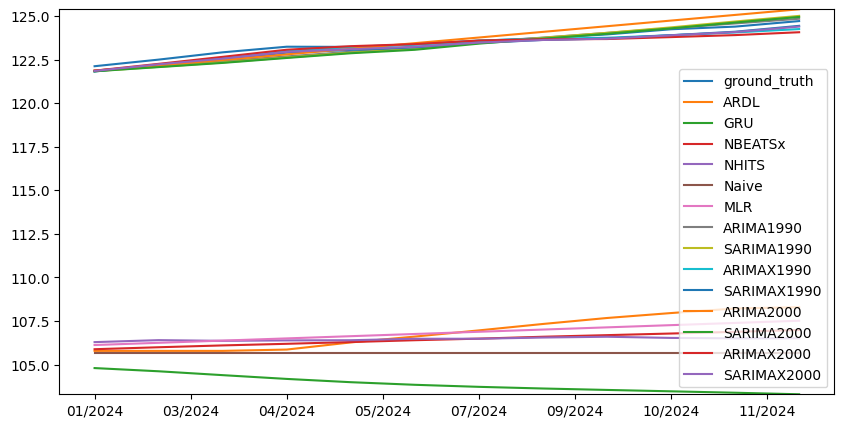

In [21]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.locator_params(axis='x', nbins=10)

for model in predsDf.columns:
    plt.plot(predsDf.index, predsDf[model])

plt.ylim(predsDf.drop('ARDL', axis=1).min(axis=0).min(), predsDf.drop('ARDL', axis=1).max(axis=0).max())
plt.legend(predsDf.columns)
plt.show()

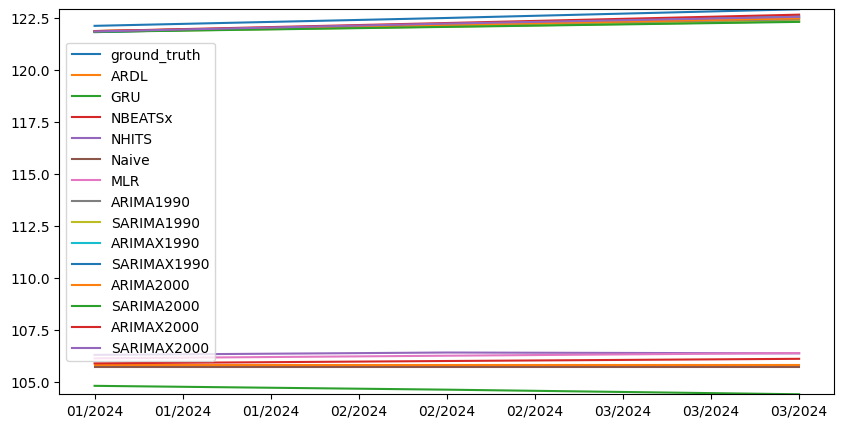

In [22]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.locator_params(axis='x', nbins=10)

for model in predsDf.columns:
    plt.plot(predsDf.index[:int(len(predsDf)/4)], predsDf[model][:int(len(predsDf)/4)])

plt.ylim(predsDf[:int(len(predsDf)/4)].drop('ARDL', axis=1).min(axis=0).min(), predsDf[:int(len(predsDf)/4)].drop('ARDL', axis=1).max(axis=0).max())
plt.legend(predsDf.columns)
plt.show()